<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Multimodal RAG with Document Retrieval (ColPali), Vision Language Model (ColQwen2) and Amazon Nova
</h1>

Welcome to this tutorial on leveraging vision-driven RAG systems, based  on one of the latest research papers like [ColPali](https://arxiv.org/abs/2407.01449), [ColQwen2](https://huggingface.co/vidore/colqwen2-v0.1), and [Amazon Nova](https://www.aboutamazon.com/news/aws/amazon-nova-artificial-intelligence-bedrock-aws). Before diving into the systems, let's frame our problem statement.

Typically, a text-based RAG system works with a corpus of documents to answer queries. 

But what happens when these documents are not just text but include images, tables, and other formats? In a [previous tutorial](https://github.com/debnsuma/fcc-ai-engineering-aws/blob/main/03-multimodal-rag/01_Multi_modal_RAG_Amazon_Bedrock_Nova.ipynb), we explored how we use external tools, to extract text, images, and tables in the first place before using them as input to the RAG workflow. While effective, this method isn't always optimal.

![ColPali System Overview](imgs/img1.png)


And this is where vision-driven RAG systems come into play. But before we start, let's understand the motivation behind this. 


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Motivation
</h1>

Consider the task of answering questions from a document, similar to a `reading comprehension test`. You're provided with a text and must dig into it to find answers. 

Like, here given a document(a book) and a question or query (What is universal approximation theorem?), you need to find the answer to the query.

![Reading Comprehension](imgs/img2.png)


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  How to approach this?
</h1>

Here’s a step-by-step approach you might take:

#### **Step 1: Document Comprehension**
- **Grasp the Full Content**: Start by understanding the document's overall structure, including text and visual elements like images, charts and tables, and note the organization of information.

![Document Structure](imgs/img3.png)

#### **Step 2: Analyzing the Query**
- **Dissect the Query**: Break down the query to determine the exact information needed. For instance, if the query asks about the "universal approximation theorem," identify the key sections related to this term.

#### **Step 3: Document Search**
- **Targeted Search**: Look for relevant text, diagrams, tables, charts, or summaries that explain complex concepts in both simplified and detailed ways.

![Search Process](imgs/img4.png)

#### **Step 4: Integrating Information**
- **Link Related Information**: Combine related pieces of information, such as text descriptions with corresponding diagrams, to enhance understanding.

![Information Integration](imgs/img5.png)


#### **Step 5: Crafting a Response**
- **Synthesize the Answer**: Compile the information into a comprehensive response, explaining complex concepts clearly and concisely.


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Challenges with Conventional RAG
</h1>

Traditional RAG systems face significant hurdles:

1. **Lack of Structural Insight**: These systems often fail to consider the structured presentation of documents, focusing only on text.
2. **Fragmented Information Retrieval**: Retrieval processes can be disjointed, missing crucial connections between document parts.
3. **Poor Multimodal Integration**: Struggles arise in effectively utilizing diverse data formats within a document.
4. **Superficial Retrieval Techniques**: Important details are often overlooked, which are essential for deep understanding.

![Challenges with Conventional RAG](../03-multimodal-rag/imgs/multimodal-rag1.png)


<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  ColPali: Efficient Document Retrieval with Vision Language Models
</h1>

The introduction of [ColPali](https://github.com/illuin-tech/colpali) marks a pivotal advancement in AI, blending vision with language processing to mimic human-like understanding of documents.

### **Innovative Features of ColPali**

ColPali uses vision-language models (VLMs) to enhance document processing, bypassing traditional text extraction steps and directly analyzing documents as they are.

![ColPali Overview](imgs/img6.png)

#### **How ColPali Enhances Efficiency**

1. **Patch Creation**: Documents are divided into manageable image patches, simplifying complex page layouts into smaller, processable units.
   
   ![Patch Creation](imgs/img7.png)

2. **Generating Brain Food**: Each patch is converted into embeddings, rich numerical representations that capture both visual and contextual data.

   ![Embedding Process](imgs/img8.png)

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  Vision Language Model (VLM)
</h1>

To fully grasp the embedding process in ColPali, it's essential to understand Vision Language Models (VLMs), which excel at integrating visual data with textual annotations. For an in-depth exploration of VLMs, please refer to the [previous tutorial](https://github.com/debnsuma/fcc-ai-engineering-aws/blob/main/02-multimodal-llm/00_Introduction_MultimodalLLM.ipynb).

At a high level, VLMs consist of the following key components:

- **Image Encoder**: Breaks down images into patches, encoding each into embeddings.
- **Text Encoder**: Simultaneously, text data is encoded into its own set of embeddings.

![VLM Architecture](imgs/img9.png)



### **Image Encoder**
The Image Encoder segment of a VLM breaks down images into smaller patches and processes each patch individually to generate embeddings. These embeddings represent the visual data in a format that the model can understand and utilize.

- **Patch Processing**: Images are divided into patches, which are then individually fed into the encoder. This modular approach allows the model to focus on detailed aspects of each image segment, facilitating a deeper understanding of the overall visual content.

  ![Patch Encoding](imgs/img10.png)

- **Adapter Layer Transformation**: After encoding, the output from the image encoder passes through an adapter layer. This layer converts the visual embeddings into a numerical format optimized for further processing within the model.

  ![Adapter Layer](imgs/img11.png)

### **Text Encoder**
Parallel to the image encoding, the Text Encoder processes textual data. It converts text into a set of embeddings that encapsulate the semantic and syntactic nuances of the language.

- **Text Processing**: Text is input into the encoder, which then produces embeddings. These embeddings capture the textual context and are crucial for the model to understand and generate language-based responses.

  ![Text Encoding](imgs/img12.png)

### **Integration and Output Generation**
The final stage in the VLM involves integrating the outputs from both the image and text encoders. This integration occurs within a LLM, where both sets of embeddings interact through the Transformer's attention mechanism.

- **Contextual Interaction**: The image and text token embeddings are combined and processed through the Transformer model. This interaction allows the model to contextualize the information from both modalities, enhancing its ability to generate accurate and relevant responses based on both text and visual inputs.

  ![Final Integration](imgs/img13.png)

This comprehensive approach enables VLMs to perform complex tasks that require an understanding of both visual elements and textual information, making them ideal for tasks like multimodal RAG where nuanced document understanding is critical.

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  ColPali Embedding Process
</h1>

Remember, the first step is to divide the document into patches ? So, ColPali, treats each page of the document as an image and creates a set of patches from each page (e.g. 32x32 = 1024 patches per page).

![image.png](imgs/img7.png)

Starting with image patches, ColPali uniquely encodes each through a vision encoder, then utilizes a Transformer-based LLM to refine these embeddings, bypassing traditional softmax outputs in favor of linear projections. 

![image.png](imgs/img15.png)

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
 Query Time: Bringing It All Together
</h1>

At query time, the focus shifts to effectively harnessing precomputed embeddings to find the most relevant document pages quickly and accurately. Here's how the process unfolds:

### **Generating and Projecting Tokens**

- **Token Generation:** Initially, tokens and their embeddings are generated for the query. This involves transforming the text of the query into a format that the system can process and match against document embeddings.

- **Projection:** These tokens are then passed through the same transformer model used during the embedding process. This step involves projecting the tokens into the same embedding space as the document patches, ensuring that the subsequent comparisons are meaningful and accurate.

![Query Processing](imgs/img16.png)

### **Computing the ColBERT Scoring Matrix**

At this point, we have two things:

1. Query embeddings
2. Embeddings of all pages (at patch level granularity)

The next critical step involves computing the ColBERT scoring matrix. Here's how it works:

- **Embedding Matchup:** The scoring matrix is essentially a grid where each row corresponds to a query token and each column to a document patch. The entries in the matrix represent the similarity scores, typically calculated as the dot product between the query token embeddings and the document patch embeddings.

- **Score Maximization:** For each query token, the system identifies the maximum similarity score across all document patches. This step is crucial because it ensures that the most relevant patches are considered for generating the response.

- **Summation for Final Score:** The maximum scores for each query token are then summed up to produce a final score for each document page. This cumulative score represents the overall relevance of the page to the query.

![image.png](imgs/img17.png)

### **Selecting Top-K Pages**

Based on the scores computed:

- **Ranking and Retrieval:** The pages are ranked according to their scores, and the top-scoring pages are selected. This selection of top-K pages is crucial as it filters out the pages most likely to contain the information sought by the query.

- **Response Generation:** These top pages are then fed, along with the query, into a multimodal language model like Amazon Nova. The model uses both the textual and the visual cues from these pages to generate detailed and contextually accurate responses.

![Final Output](imgs/img18.png)

If you want to learn more about ColPali, you can refer to the [official documentation](https://github.com/illuin-tech/colpali) and also I would recommend you to read this 9 part blog series on RAG on [DailyDoseofDS](https://www.dailydoseofds.com/) by Avi Chawla and Akshay Pachaar. 
 
Ok, enough of theory. Let's see it in action :) 

<h1 style="background: linear-gradient(to right, #ff6b6b, #4ecdc4); 
           color: white; 
           padding: 20px; 
           border-radius: 10px; 
           text-align: center; 
           font-family: Arial, sans-serif; 
           text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
  ColPali with Bedrock Nova in Action
</h1>

## Setting up the environment

In [1]:
# %pip install colpali-engine torch boto3 tqdm pymupdf numpy matplotlib einops seaborn

## Importing the required libraries

In [2]:
import torch
import boto3
import os
import requests
import base64
import pymupdf

import matplotlib.pyplot as plt
import numpy as np 

from colpali_engine.models import ColQwen2, ColQwen2Processor
from torch.utils.data import DataLoader
from io import BytesIO
from tqdm import tqdm
from PIL import Image


## Loading the model and processor


In [3]:
# Check if CUDA/MPS is available
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"{device = }")

device = 'mps'


In [4]:
model_name = "vidore/colqwen2-v0.1"
model = ColQwen2.from_pretrained(
                pretrained_model_name_or_path=model_name,
                torch_dtype=torch.bfloat16,
                device_map=device, 
                cache_dir="./model_cache"
            )

processor = ColQwen2Processor.from_pretrained(
                pretrained_model_name_or_path=model_name,
                cache_dir="./model_cache"
            )

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
# Setting the model to evaluation mode
model.eval()
model

ColQwen2(
  (visual): Qwen2VisionTransformerPretrainedModel(
    (patch_embed): PatchEmbed(
      (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
    )
    (rotary_pos_emb): VisionRotaryEmbedding()
    (blocks): ModuleList(
      (0-31): 32 x Qwen2VLVisionBlock(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): VisionSdpaAttention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (mlp): VisionMlp(
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (act): QuickGELUActivation()
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        )
      )
    )
    (merger): PatchMerger(
      (ln_q): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Sequential(
        (0): L

## Downloading the dataset

In [6]:
# Downloading the dataset 
url = "https://arxiv.org/pdf/1706.03762.pdf"

# Set the filename and filepath
filename = "test.pdf"
filepath = os.path.join("data", filename)

# Create the data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(filepath, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully: {filepath}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully: data/test.pdf


In [7]:
# # Local file path
# filepath = "data/lec_04.pdf"

## Converting PDF to Images


In [8]:
# Define the function to process each page of the PDF
def process_page_images(page, page_num, base_dir):
    # Create a pixmap from the PDF page
    pix = page.get_pixmap()

    # Define the path where the image will be saved
    page_path = os.path.join(base_dir, f"page_{page_num:03d}.jpeg")

    # Save the pixmap as a JPEG image
    pix.save(page_path)

    # Open the saved image file and convert it to a base64 string
    with open(page_path, 'rb') as file:
        encoded_image = base64.b64encode(file.read()).decode('utf8')

    # Convert the base64 string back to a bytes object and create a PIL image
    image_data = BytesIO(base64.b64decode(encoded_image))
    page_image_pil = Image.open(image_data)

    # Return the PIL image object
    return page_image_pil, page_path

In [9]:
doc = pymupdf.open(filepath)
num_pages = len(doc)
output_dir = "data/processed_page_images"

images = []
images_paths = []

# Make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each page of the PDF
for page_num in tqdm(range(num_pages), desc="Processing PDF pages"):
    page = doc[page_num]
    image, page_path = process_page_images(page, page_num, output_dir)
    images.append(image)
    images_paths.append(page_path)


Processing PDF pages: 100%|██████████| 15/15 [00:00<00:00, 25.84it/s]


In [10]:
# Loading the images into a dataloader
dataloader = DataLoader(
                            dataset=images,
                            batch_size=1,
                            shuffle=False,
                            collate_fn=lambda x: processor.process_images(x),
                        )

images_embeddings  = []

for batch_doc in tqdm(dataloader):
    with torch.no_grad():
        batch_doc = {k: v.to(model.device) for k, v in batch_doc.items()}
        embeddings_doc = model(**batch_doc)
    images_embeddings.extend(list(torch.unbind(embeddings_doc.to("cpu"))))


100%|██████████| 15/15 [01:14<00:00,  4.95s/it]


## Retrieval 

In [11]:
def get_results(query, topk):
    batch_queries = processor.process_queries([query]).to(model.device)

    # Forward pass
    with torch.no_grad():
        query_embeddings = model(**batch_queries)

    scores = processor.score_multi_vector(query_embeddings, images_embeddings)
    scores = scores.squeeze(0)

    # get top-k scores
    close_vectors_id = scores.topk(topk).indices.tolist()
    
    return close_vectors_id

In [12]:
query = "What is position embedding in transformer models?"
k = 6

context_ids = get_results(query=query, topk=k)

In [13]:
print(f"Top {k} context ids: {context_ids}")

Top 6 context ids: [2, 8, 0, 1, 4, 5]


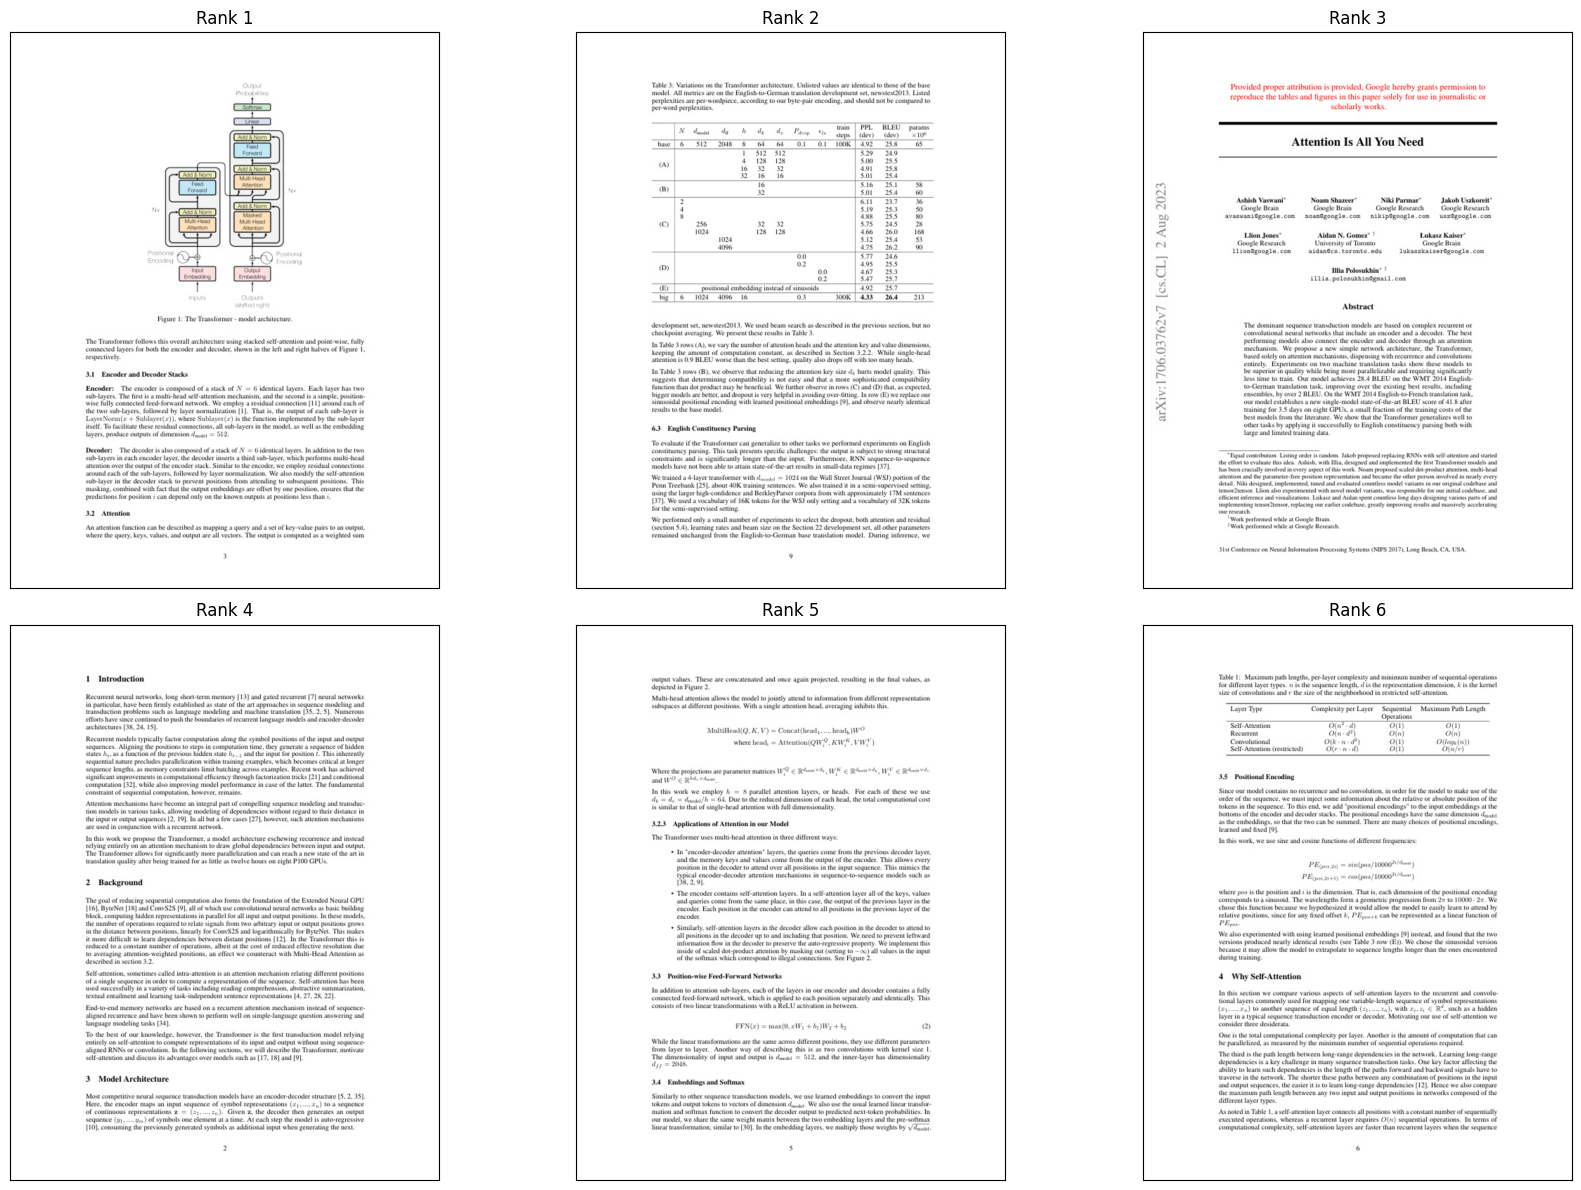

In [14]:
def display_images_in_grid(image_ids, images):
    # Number of images
    num_images = len(image_ids)
    
    # Define the number of columns for the grid
    cols = 3
    # Calculate the number of rows needed
    rows = (num_images + cols - 1) // cols
    
    # Create a figure with subplots in a grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    # Loop through the images and their corresponding axes
    for ax, image_id in zip(axes, image_ids):
        # Resize the image
        shrink_factor = (images[image_id].size[0] / 1024)
        resized_image = images[image_id].resize((int(images[image_id].size[0] / shrink_factor), 
                                                 int(images[image_id].size[1] / shrink_factor)))
        
        # Display the image in the respective subplot
        ax.imshow(resized_image)
        # Set the title for each subplot
        rank = image_ids.index(image_id) + 1
        ax.set_title(f'Rank {rank}')
        # Hide grid lines
        ax.grid(False)
        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Hide unused axes if any
    for ax in axes[len(image_ids):]:
        ax.axis('off')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

display_images_in_grid(context_ids, images)

## Interpretability

In [15]:
# # Closest top K tokens 
# context_ids

In [16]:
# # All image embeddings 
# len(images_embeddings), images_embeddings

In [17]:
# # All images in PIL - JpegImageFile format 
# len(images), images

In [18]:
from colpali_engine.interpretability import get_similarity_maps_from_embeddings
from colpali_engine.interpretability import plot_similarity_map

In [19]:
def visualize_similarity_map(image, query, model, processor):

    # Get the device 
    device = model.device
    
    # Prreprocess inputs
    batch_images = processor.process_images([image]).to(device)
    batch_queries = processor.process_queries([query]).to(device)
    
    # Forward passes
    with torch.no_grad():
        image_embeddings = model.forward(**batch_images)
        query_embeddings = model.forward(**batch_queries)
    
    
    # Get the number of image patches
    n_patches = processor.get_n_patches(image_size=image.size, 
                                        patch_size=model.patch_size,
                                        spatial_merge_size=model.spatial_merge_size)
    
    
    
    
    # Get the tensor mask to filter out the embeddings that are not related to the image
    image_mask = processor.get_image_mask(batch_images)
    
    # Generate the similarity maps
    batched_similarity_maps = get_similarity_maps_from_embeddings(
                                                                    image_embeddings=image_embeddings,
                                                                    query_embeddings=query_embeddings,
                                                                    n_patches=n_patches,
                                                                    image_mask=image_mask,
                                                                )
    
    # Get the similarity map for our (only) input image
    similarity_maps = batched_similarity_maps[0]  # (query_length, n_patches_x, n_patches_y)
    
    # Tokenize the query
    query_tokens = processor.tokenizer.tokenize(query)
    query_tokens = [item.replace('Ġ', '') for item in query_tokens]
    
    # Picking a random token 
    token_idx = np.random.choice(len(query_tokens))
    
    # Get the similarity map for our (only) input image
    fig, ax = plot_similarity_map(image, 
                                  similarity_maps[token_idx],
                                  figsize=(8, 8),
                                  show_colorbar=False)
    
    max_sim_score = similarity_maps[token_idx, :, :].max().item()
    ax.set_title(f"Token #{token_idx}: `{query_tokens[token_idx]}`. MaxSim score: {max_sim_score:.2f}", fontsize=14)

    return fig

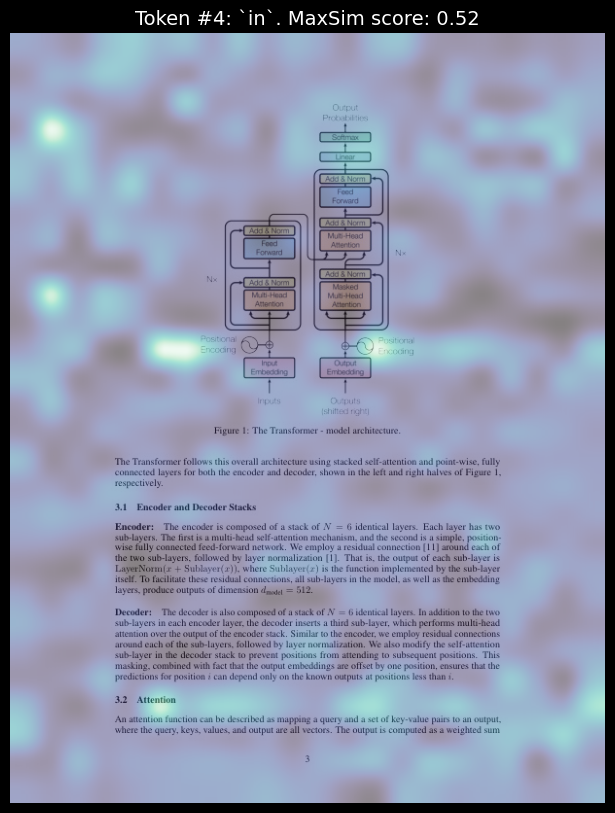

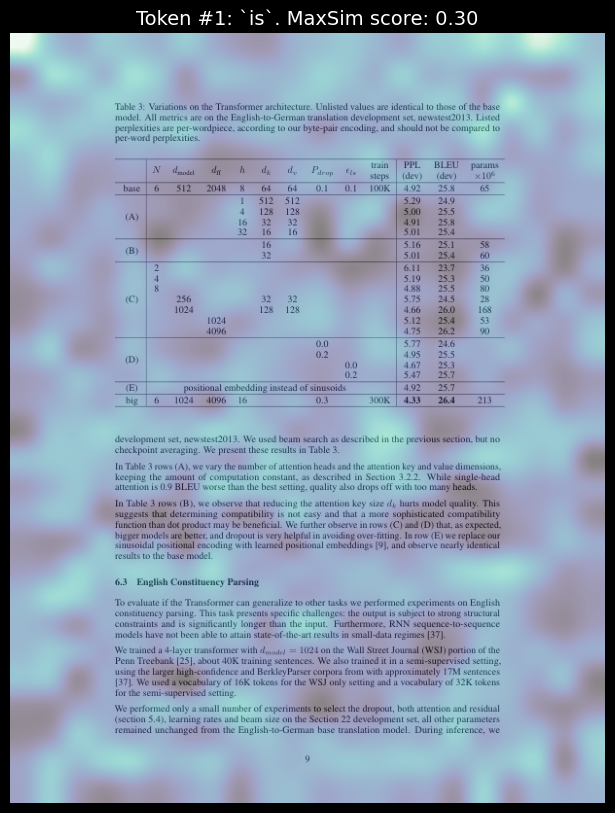

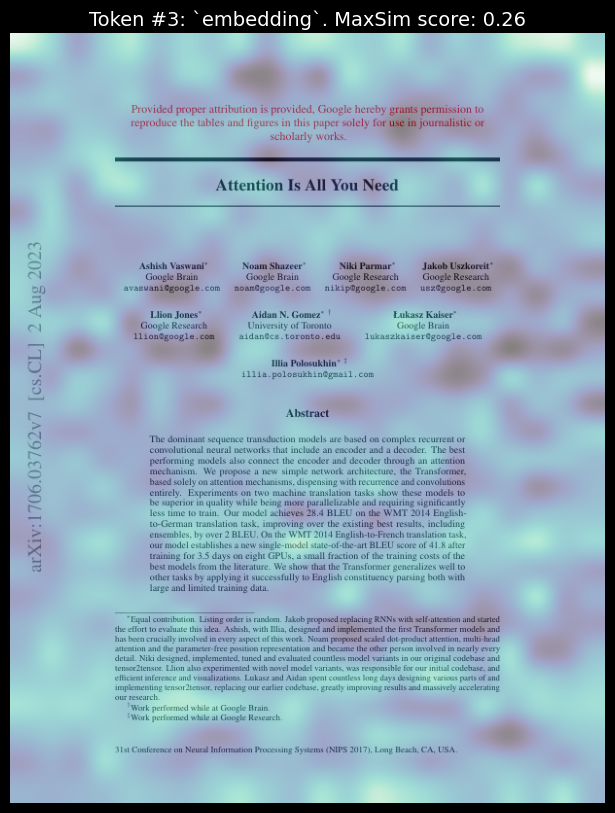

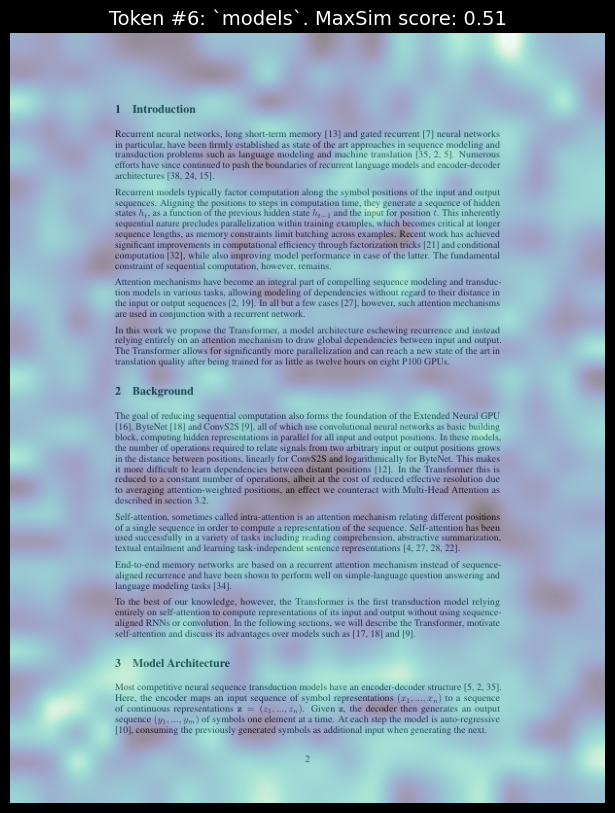

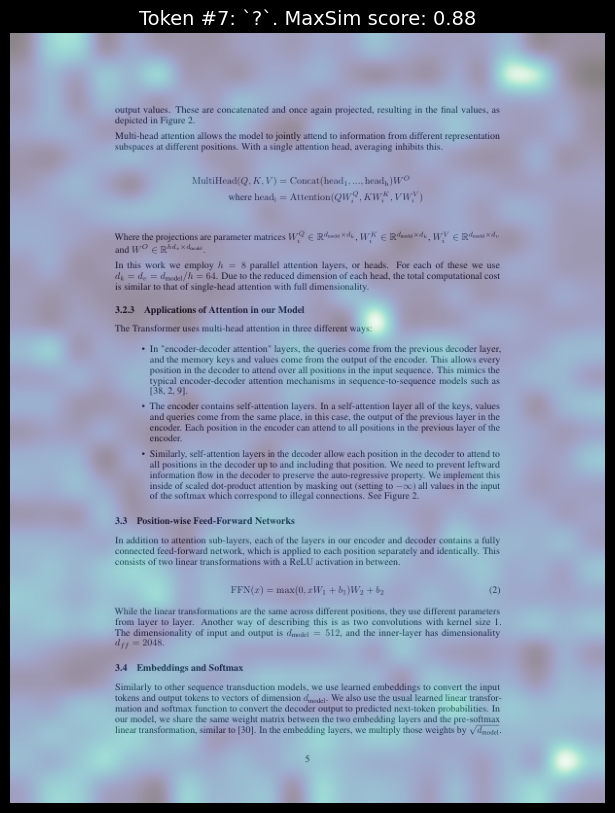

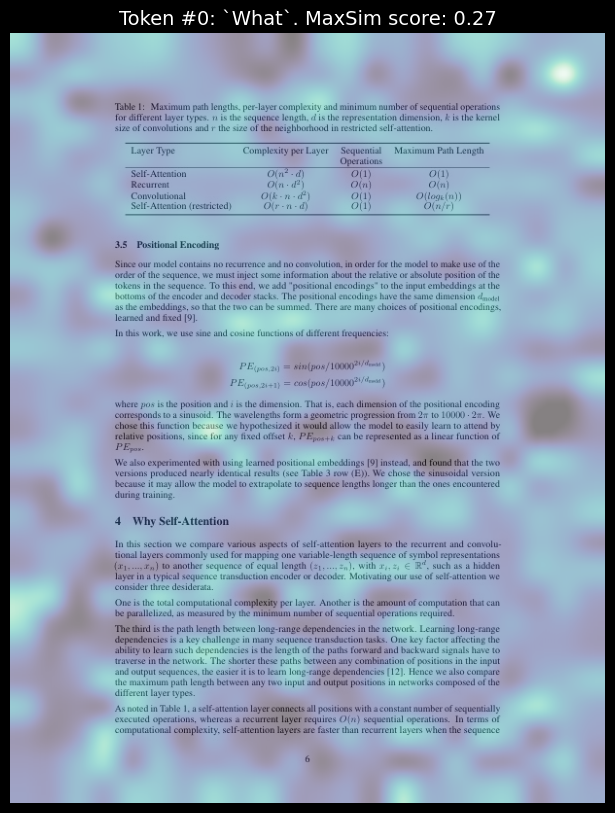

In [20]:
figs = []
for idx in context_ids:
    image = images[idx]
    fig = visualize_similarity_map(image, query, model, processor)
    figs.append(fig)


## Generation with Amazon Nova

In [21]:
def read_and_encode_image(image_path: str):

    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()
        
    base64_encoded = base64.b64encode(image_bytes).decode('utf-8')
    # Determine the image format (supported formats: jpg, jpeg, png, gif, webp)
    image_format = Image.open(image_path).format.lower()

    message_content = {
                    "image": {
                        "format": image_format,
                        "source": {"bytes": image_bytes},
                    }
                }
    
    return message_content


def send_images_to_model_using_converse(matched_items: list, query: str, model_id: str):

    system_prompt = 'You are a helpful assistant for question answering. Given the context, answer the question.'

    image_list = []
    for image_path in matched_items:
        image_list.append({
            "image_path": image_path, 
        })

    content_list = []
    for img in image_list:
        message_content = read_and_encode_image(img['image_path'])
        content_list.append(message_content)
    
    content_list.append({"text": query})
    system = [ { "text": system_prompt } ]
    
    # Define a "user" message including both the image and a text prompt.
    messages = [
        {
            "role": "user",
            "content": content_list,
        }
    ]
    
    # Configure the inference parameters.
    inf_params = {"temperature": .3, "maxTokens": 5000}
    
    # Initialize the Bedrock client
    client = boto3.client('bedrock-runtime', region_name='us-east-1')

    response = client.converse(
        modelId=model_id, 
        messages=messages,
        system=system, 
        inferenceConfig=inf_params
    )
    
    # Print Response
    output_message = response["output"]["message"]["content"][0]["text"]

    return output_message

In [22]:
matched_items = [images_paths[idx] for idx in context_ids]
matched_items

['data/processed_page_images/page_002.jpeg',
 'data/processed_page_images/page_008.jpeg',
 'data/processed_page_images/page_000.jpeg',
 'data/processed_page_images/page_001.jpeg',
 'data/processed_page_images/page_004.jpeg',
 'data/processed_page_images/page_005.jpeg']

In [23]:
PRO_MODEL_ID = "amazon.nova-pro-v1:0"
LITE_MODEL_ID = "amazon.nova-lite-v1:0"
MICRO_MODEL_ID = "amazon.nova-micro-v1:0"

response = send_images_to_model_using_converse(matched_items=matched_items, query=query, model_id=PRO_MODEL_ID)
print(response)

Position embedding is a technique used in transformer models to encode the position of each token in a sequence. It is added to the input tokens to provide information about the relative or absolute position of the token in the sequence. In the Transformer model, sine and cosine functions of different frequencies are used for position embedding.
